In [1]:
include("../vis/vis.jl")

┌ Info: Recompiling stale cache file /Users/tristan/.julia/compiled/v1.1/Makie/iZ1Bl.ji for Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/tristan/.julia/compiled/v1.1/LightGraphs/Xm08G.ji for LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/tristan/.julia/compiled/v1.1/BALUtils/NXPkz.ji for BALUtils [0905a5ce-360c-11e9-2081-2954d989a4fb]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/tristan/.julia/compiled/v1.1/PETScBinaryIO/0UAFf.ji for PETScBinaryIO [437dea2e-de0d-11e8-31df-ef70b35f8dd5]
└ @ Base loading.jl:1184


linesegments_eigen! (generic function with 1 method)

In [2]:
ba_affinity = load_ba("../bal-data/ladybug/problem-1723-156502-pre.txt", "../../multigrid_analysis/ladybug-2lvl-eigs-affinity.h5", "../ba-tao/ladybug-1723-S-scale.petsc", "../bamg/ladybug-2lvl-P-affinity.petsc", 1)
ba_visibility = load_ba("../bal-data/ladybug/problem-1723-156502-pre.txt", "../../multigrid_analysis/ladybug-2lvl-eigs-visibility.h5", "../ba-tao/ladybug-1723-S-scale.petsc", "../bamg/ladybug-2lvl-P-visibility.petsc", 1)

Bundle adjustment problem with 1723 cameras, 156502 points, 678718 observations with 230 eigenvalues

In [3]:
collect(ba_affinity.cr_eigs)[1][2]

9×1723 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   1.02407e-6  …   5.2831e-5   -0.000304293
 0.0  0.0  0.0  0.0  0.0  -1.68747e-6     -1.49928e-5  -1.0582e-6  
 0.0  0.0  0.0  0.0  0.0  -1.44445e-8      7.75103e-5  -0.000177238
 0.0  0.0  0.0  0.0  0.0   9.38872e-7      3.46928e-5  -0.00016491 
 0.0  0.0  0.0  0.0  0.0   2.70201e-7      2.08741e-5  -0.000192259
 0.0  0.0  0.0  0.0  0.0   2.88645e-6  …  -3.02186e-6   0.000534114
 0.0  0.0  0.0  0.0  0.0  -7.28013e-6     -2.83975e-5   0.000158904
 0.0  0.0  0.0  0.0  0.0   5.91887e-6      4.99294e-5  -5.47499e-5 
 0.0  0.0  0.0  0.0  0.0  -4.24256e-6     -2.34257e-5   5.25844e-5 

"Eigenvalue: 0.00010000591204629941"

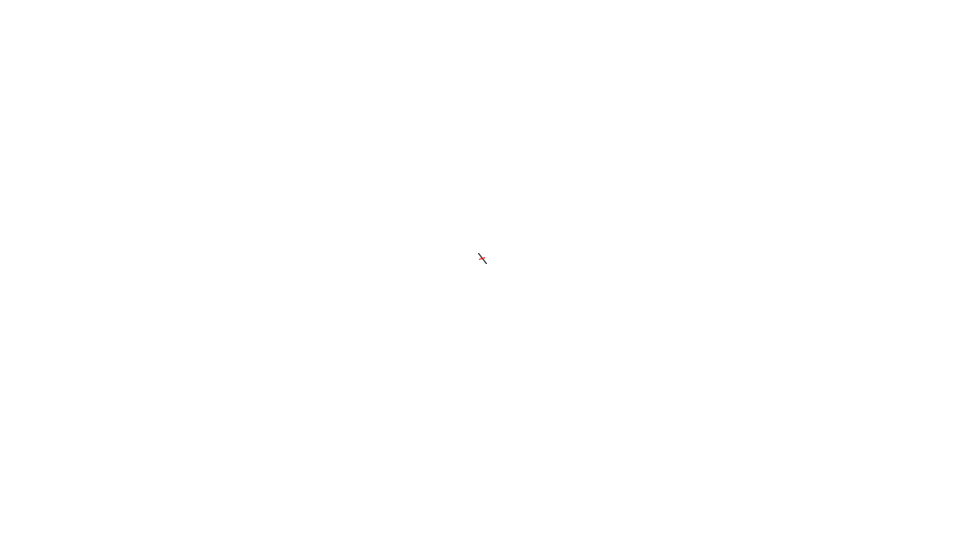

In [4]:
index = 1
ba = ba_visibility
es = collect(ba.cr_eigs)[index]
display("Eigenvalue: $(es[1])")
s = Scene()
scatter_eigen!(s, ba, index)
s

In [5]:
norms = mapslices(norm, es[2], dims=1)[:]
p = sortperm(norms, rev=true)[1:2]
s = Scene()
ba_res = restrict(ba, p; ignore_points=false)
display("Observations before restricting")
display(length.(ba.ba.observations[p]))
display("Observations after restricting")
display(length.(ba_res.ba.observations))
scatter_eigen!(s, ba_res, index)
scatter!(s, ba.ba.points, color=RGBA(0.0,0.0,0.0,0.1), transparency=true, markersize=0.04, show_axis=false)
scatter!(s, ba_res.ba.points, color=:red, transparency=true, markersize=0.04, show_axis=false)
draw_observations!(s, ba_res.ba, transparency=true, show_axis=false)
s

MethodError: MethodError: no method matching restrict(::BA, ::Array{Int64,1}; ignore_points=false)
Closest candidates are:
  restrict(!Matched::BAProblem, ::Any; ignore_points) at /Users/tristan/Sync/Research/bundle_adjustment/vis/vis.jl:69

"Eigenvector norms and aggregate id"

10-element Array{Tuple{Float64,Int64},1}:
 (0.7079376829692495, 270)    
 (0.7062562884855569, 270)    
 (0.0050035197716171926, 270) 
 (0.00048407075381014556, 270)
 (0.00047235695592190517, 270)
 (0.00047199651080906933, 270)
 (0.0004589811902526218, 270) 
 (0.0004054039938161655, 270) 
 (0.0003306683340915775, 269) 
 (0.00019219836897625244, 269)

"Highest magnitude components of eigenmode"

9×10 Array{Float64,2}:
  0.100872     -0.102463      0.00138831   …  -7.03752e-5   -5.9593e-6  
  0.578102     -0.577597      0.000749995     -0.000236649   0.00012517 
 -0.0666311     0.0660752     0.00123393       9.71449e-5    4.01786e-5 
  0.233675     -0.230396     -0.00270071      -0.000106333   3.31925e-5 
 -0.151183      0.15453      -0.00348888       8.92701e-5   -1.27122e-5 
 -0.273674      0.270838      0.00124563   …   0.000126764  -0.000133536
  0.000324304  -0.000154205  -2.07205e-5      -1.69773e-5    2.07533e-5 
 -0.00100029    0.000470014   6.04174e-5       5.0782e-5    -4.03416e-6 
  0.000437918  -0.000204315  -3.04014e-5      -2.71467e-5    8.9816e-6  

10×10 Array{Int64,2}:
 315  233  220  231  232  226  223  236  225   83
 233  318  246  240  246  232  231  233  221   81
 220  246  313  240  240  231  226  221  229   86
 231  240  240  306  245  240  233  232  227   78
 232  246  240  245  323  244  232  239  228   84
 226  232  231  240  244  321  238  230  231   88
 223  231  226  233  232  238  327  231  226   92
 236  233  221  232  239  230  231  341  230   85
 225  221  229  227  228  231  226  230  308   79
  83   81   86   78   84   88   92   85   79  240

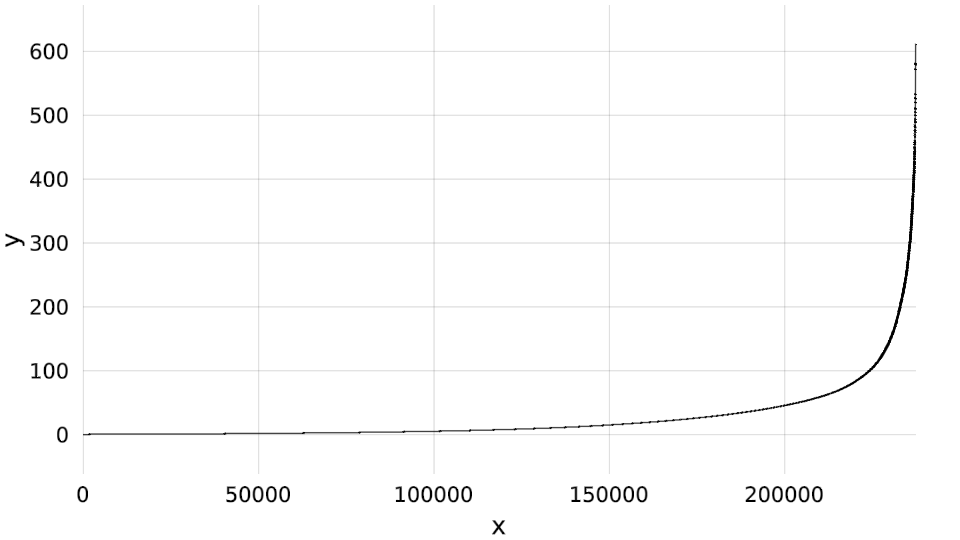

In [6]:
norms = mapslices(norm, es[2], dims=1)[:]
p = sortperm(norms, rev=true)[1:10]
display("Eigenvector norms and aggregate id")
display(collect(zip(norms[p], ba.aggregates[p])))
display("Highest magnitude components of eigenmode")
display(es[2][:, p])
vg = visibility_graph(ba.ba)
display(Array(vg[p,p]))
vg_ = copy(vg)
vg_[diagind(vg_)] .= 0
_,_,ks = findnz(vg_)
lines(sort(ks))

In [7]:
# number of eigenmodes where highest values appear in the same aggregate
map(1:length(ba.cr_eigs)) do index
    ba = ba_visibility
    es = collect(ba.cr_eigs)[index]
    norms = mapslices(norm, es[2], dims=1)[:]
    p = sortperm(norms, rev=true)[1:2]
    length(unique(ba.aggregates[p])) == 1
end |> count

206